In [73]:
# Task 1:
# Download any clustering dataset from internet and after finding how many optimum number of
# clusters should be formed using elbow curve, apply k-means on it using library. (other than in Task2)

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [75]:
file_path = r'C:\Users\i\Downloads\product+classification+and+clustering\pricerunner_aggregate.csv' 
data = pd.read_csv(file_path)

In [76]:
data.columns = data.columns.str.strip()

In [77]:
features = data[['Merchant ID', 'Category ID']]

In [78]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [79]:
wcss = []  
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')  
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

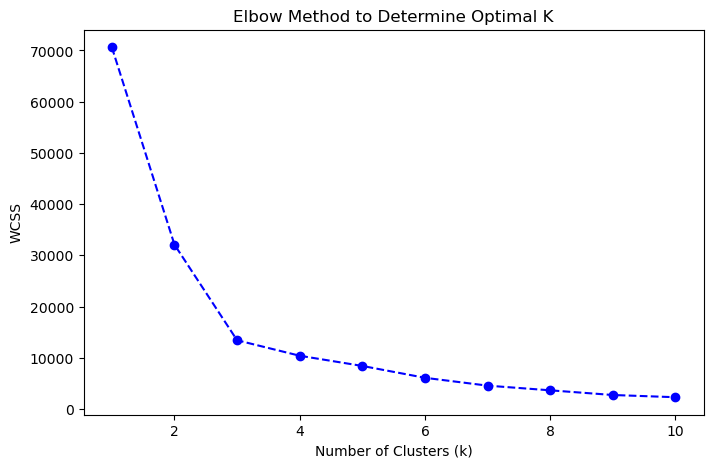

In [80]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [81]:
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(features_scaled)

In [82]:
data['Cluster'] = clusters

In [83]:
print(data.head())

   Product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   

   Cluster ID             Cluster Label  Category ID Category Label  Cluster  
0           1  Apple iPhone 8 Plus 64GB         2612  Mobile Phones        2  
1           1  Apple iPhone 8 Plus 64GB         2612  Mobile Phones        2  
2           1  Apple iPhone 8 Plus 64GB         2612  Mobile Phones        2  
3           1  Apple iPhone 8 Plus 64GB         2612  Mobile Phones        2  
4           1  Apple iPhone 8 Plus 64GB         2612  Mobile Phones        2  


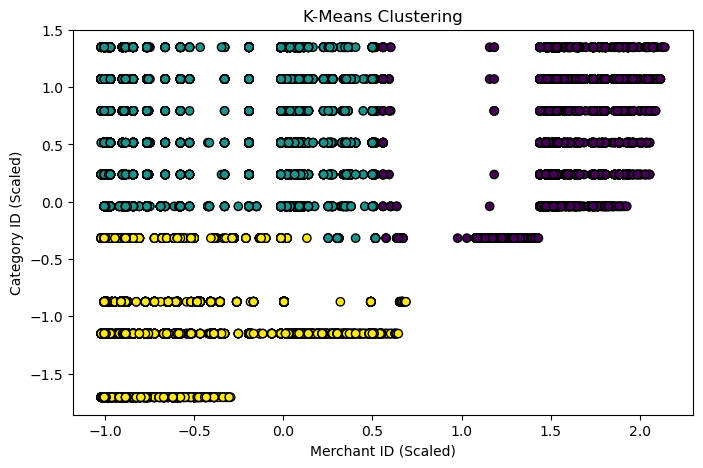

In [84]:
plt.figure(figsize=(8, 5))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering')
plt.xlabel('Merchant ID (Scaled)')
plt.ylabel('Category ID (Scaled)')
plt.show()

In [85]:
# Task 2
# Imagine you work for an e-commerce company that wants to understand customer segments based on their online shopping behavior. The company has collected data on the total amount spent by customers and the number of items they purchased in a year. Your task is to use K-means clustering to identify distinct customer segments.
# • Load the customer data (let's call it shopping_data.csv) into a DataFrame.
# • Explore and understand the structure of the dataset.
# • Select the relevant features for clustering (e.g., total amount spent and number of items purchased).
# • Standardize the selected features.
# • Choose an appropriate number of clusters for customer segmentation.
# • Apply K-means clustering to the standardized data.
# • Assign each customer to a cluster.
# • Analyze and interpret the clusters to provide insights for marketing or business strategy.
# • Remember to visualize the results if possible and provide meaningful interpretations of the identified clusters.

In [86]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv(r'C:\Users\i\Downloads\shopping_data.csv')

In [88]:
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nMissing values in the dataset:")
print(df.isnull().sum())

First 5 rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ----

In [89]:
df = df.dropna(subset=['CustomerID'])  
df = df[df['Quantity'] > 0]  
df = df[df['UnitPrice'] > 0] 

In [90]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [91]:
customer_data = df.groupby('CustomerID').agg({
    'TotalAmount': 'sum',  
    'InvoiceNo': 'count', 
    'Quantity': 'sum'     
}).rename(columns={
    'InvoiceNo': 'TotalTransactions',
    'Quantity': 'TotalQuantity'
}).reset_index()

print("\nAggregated Customer Data:")
print(customer_data.head())


Aggregated Customer Data:
   CustomerID  TotalAmount  TotalTransactions  TotalQuantity
0     12346.0     77183.60                  1          74215
1     12347.0      4310.00                182           2458
2     12348.0      1797.24                 31           2341
3     12349.0      1757.55                 73            631
4     12350.0       334.40                 17            197


In [92]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['TotalAmount', 'TotalTransactions', 'TotalQuantity']])

In [93]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

C:\Users\i\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\i\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\i\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\i\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\i\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: F

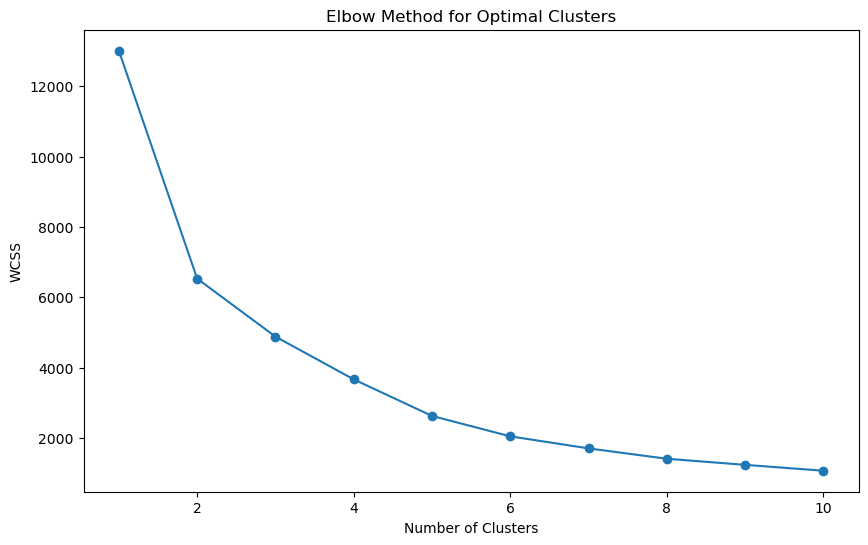

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [95]:
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\i\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\i\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


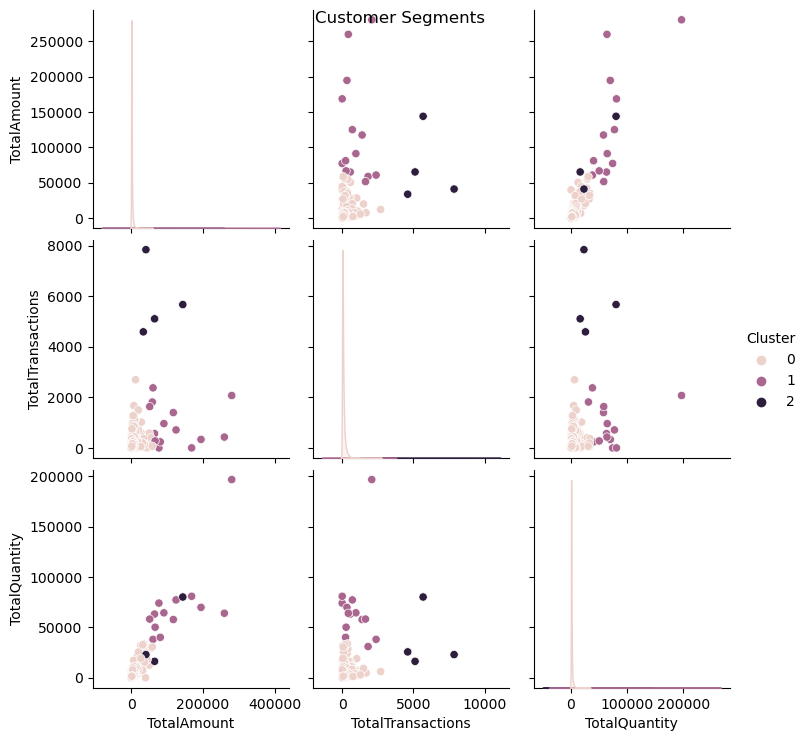

In [96]:
sns.pairplot(customer_data, hue='Cluster', diag_kind='kde', vars=['TotalAmount', 'TotalTransactions', 'TotalQuantity'])
plt.suptitle('Customer Segments')
plt.show()

In [97]:
customer_data.to_csv('customer_clusters.csv', index=False)
print("\nCustomer clustering results saved to 'customer_clusters.csv'")


Customer clustering results saved to 'customer_clusters.csv'


In [98]:
# Task 3:
# You are a data scientist working for a financial institution that collects data on customers' financial behavior. The dataset includes various features such as income, spending habits, savings, and investment preferences. The management is interested in gaining insights from the data and reducing its dimensionality for easier analysis. Your task is to implement Principal Component Analysis (PCA) to extract meaningful patterns and reduce the dimensionality of the dataset.
# • Load the financial dataset (let's call it financial_data.csv) into a DataFrame.
# • Explore and understand the structure of the dataset.
# • Select the relevant features for PCA (e.g., income, spending habits, savings).
# • Standardize the selected features.
# • Apply PCA to the standardized data.
# • Analyze the principal components to identify patterns and correlations in the data.
# • Determine the number of principal components to retain based on the explained variance.
# • Transform the original data using the selected principal components.
# • Provide insights or recommendations based on the reduced-dimensional representation of the data.
# Remember to communicate the significance of the principal components and how they contribute to understanding the underlying patterns in the financial behavior of customers.

In [99]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
file_path = r'C:\Users\i\Downloads\archive(8)\Finance_data.csv' 
df = pd.read_csv(file_path)

In [101]:
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nMissing values in the dataset:")
print(df.isnull().sum())

First 5 rows of the dataset:
   gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0  Female   34                Yes             1              2           5   
1  Female   23                Yes             4              3           2   
2    Male   30                Yes             3              6           4   
3    Male   22                Yes             2              1           3   
4  Female   24                 No             2              1           3   

   Government_Bonds  Fixed_Deposits  PPF  Gold  ...           Duration  \
0                 3               7    6     4  ...          1-3 years   
1                 1               5    6     7  ...  More than 5 years   
2                 2               5    1     7  ...          3-5 years   
3                 7               6    4     5  ...   Less than 1 year   
4                 6               4    5     7  ...   Less than 1 year   

  Invest_Monitor   Expect       Avenue What are your savi

In [102]:
df = df.dropna() 

In [103]:
df = pd.get_dummies(df, drop_first=True)

In [104]:
numerical_features = df.select_dtypes(include=[np.number])

In [105]:
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

In [106]:
pca = PCA(n_components=2)  
pca_components = pca.fit_transform(numerical_features_scaled)

In [107]:
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

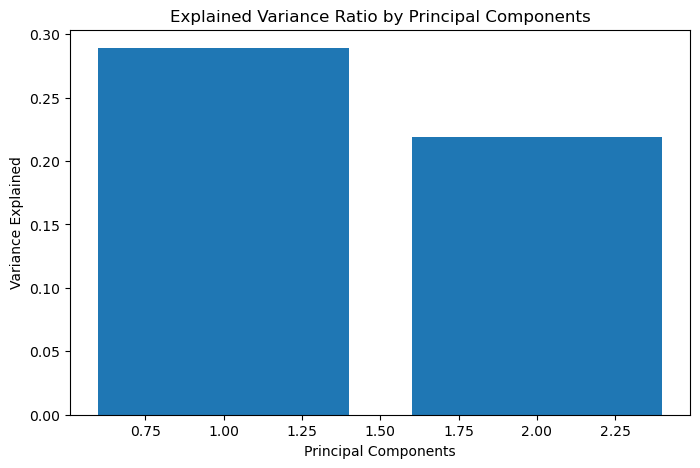

In [108]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [109]:
kmeans = KMeans(n_clusters=3, random_state=42)  
pca_df['Cluster'] = kmeans.fit_predict(pca_df)

C:\Users\i\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\i\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


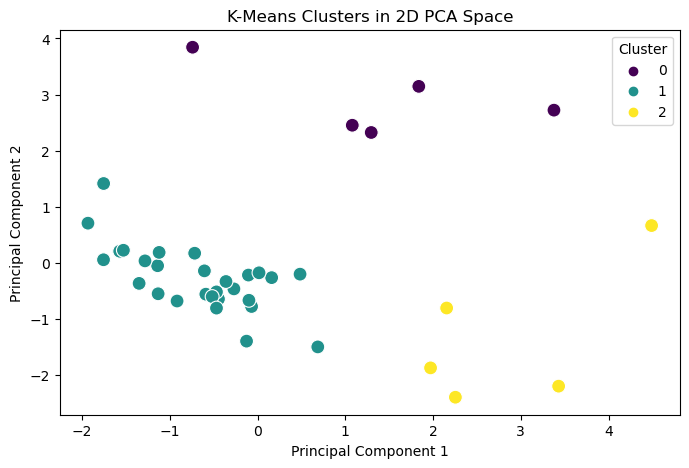

In [110]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=100, marker='o')
plt.title('K-Means Clusters in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [111]:
print("\nCluster Centers (PCA space):")
print(kmeans.cluster_centers_)


Cluster Centers (PCA space):
[[ 1.36984031  2.89769771]
 [-0.70502656 -0.26256051]
 [ 2.86031908 -1.32233464]]


In [112]:
df['Cluster'] = pca_df['Cluster']

In [113]:
df.to_csv('clustered_investor_data.csv', index=False)
print("\nClustered data saved to 'clustered_investor_data.csv'")


Clustered data saved to 'clustered_investor_data.csv'
